A learning curve is a correlation between a learner’s performance on a task and the number of attempts or time required to complete the task; this can be represented as a direct proportion on a graph.

In [2]:
from sklearn.model_selection import learning_curve

In [3]:
# data
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [7]:
train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

In [10]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

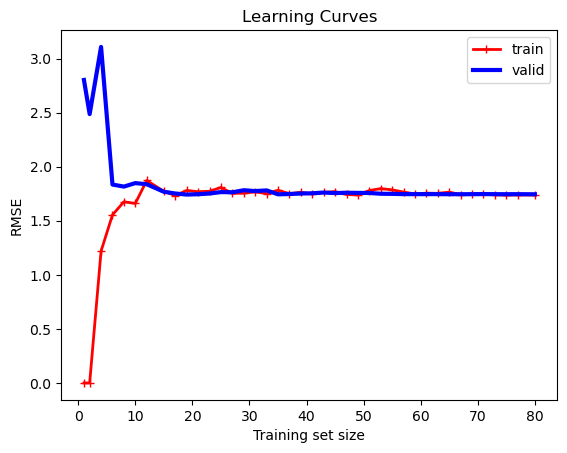

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "-b", linewidth=3, label="valid")

plt.title("Learning Curves")
plt.xlabel("Training set size")
plt.ylabel("RMSE")

plt.legend()
plt.show()